In [1]:
import json
json_data=[]
with open("Musical_Instruments_5.json", "r") as json_file:
  for line in json_file:
        try:
            json_data.append(json.loads(line))
            # print(data)
        except json.JSONDecodeError as e:
            print("Error decoding JSON:", e)


In [2]:
json_data

[{'reviewerID': 'A2IBPI20UZIR0U',
  'asin': '1384719342',
  'reviewerName': 'cassandra tu "Yeah, well, that\'s just like, u...',
  'helpful': [0, 0],
  'reviewText': "Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",
  'overall': 5.0,
  'summary': 'good',
  'unixReviewTime': 1393545600,
  'reviewTime': '02 28, 2014'},
 {'reviewerID': 'A14VAT5EAX3D9S',
  'asin': '1384719342',
  'reviewerName': 'Jake',
  'helpful': [13, 14],
  'reviewText': "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filte

In [3]:
import pandas as pd

data = pd.DataFrame(json_data)
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


### Here we review the amozon product so revier name not important but reviewText important so don't not remove rows fill the reviewername with unknown

In [4]:
data.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [5]:
data["reviewerName"]=data["reviewerName"].fillna("Unknown")
data.isna().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [6]:
data["reviews"]=data["reviewText"] + ' ' + data["summary"]

data.drop(["summary","reviewText"],axis=1,inplace=True)

data

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...
...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5.0,1405814400,"07 20, 2014","Great, just as expected. Thank to all. Five S..."
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5.0,1404259200,"07 2, 2014",I've been thinking about trying the Nanoweb st...
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4.0,1405987200,"07 22, 2014",I have tried coated strings in the past ( incl...
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4.0,1404172800,"07 1, 2014","Well, MADE by Elixir and DEVELOPED with Taylor..."


In [7]:
data['overall'].value_counts()

overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

### over all colunm is rating out of 5

In [8]:
def find_star_based_rating(row):
  if row['overall'] == 3.0:
    val = 'Neutral'
  elif row['overall'] == 1.0 or row['overall'] == 2.0:
    val = 'Negative'
  elif row['overall'] == 4.0 or row['overall'] == 5.0:
    val = 'Positive'
  else:
    val = -1
  return val

In [9]:
data['sentiment'] = data.apply(find_star_based_rating, axis=1)
data.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [10]:
data['sentiment'].value_counts()

sentiment
Positive    9022
Neutral      772
Negative     467
Name: count, dtype: int64

## Handling time column

In [11]:
time=pd.to_datetime(data["reviewTime"])
data["year"]=time.dt.year
data["month"]=time.dt.month
data["day"]=time.dt.day
data

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive,2014,2,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive,2013,3,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive,2013,8,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive,2014,2,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive,2014,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",5.0,1405814400,"07 20, 2014","Great, just as expected. Thank to all. Five S...",Positive,2014,7,20
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",5.0,1404259200,"07 2, 2014",I've been thinking about trying the Nanoweb st...,Positive,2014,7,2
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",4.0,1405987200,"07 22, 2014",I have tried coated strings in the past ( incl...,Positive,2014,7,22
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",4.0,1404172800,"07 1, 2014","Well, MADE by Elixir and DEVELOPED with Taylor...",Positive,2014,7,1


## Finding the helpfulness of the review

In [12]:
def rate(arr):
  try:
    return arr[0] / arr[1]
  except ZeroDivisionError:
    return 0

data['helpful_rate']=data['helpful'].apply(lambda x:round(rate(x),2) )

data.drop(['helpful'], axis=1, inplace=True)

data.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,reviews,sentiment,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive,2014,2,28,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive,2013,3,16,0.93
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive,2013,8,28,1.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive,2014,2,14,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive,2014,2,21,0.00


In [13]:
df=data.copy()
df.drop(['reviewerName','unixReviewTime'], axis=1, inplace=True)
df.head()

,reviewerID,asin,overall,reviewTime,reviews,sentiment,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,"02 28, 2014","Not much to write about here, but it does exac...",Positive,2014,2,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,"03 16, 2013",The product does exactly as it should and is q...,Positive,2013,3,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,"08 28, 2013",The primary job of this device is to block the...,Positive,2013,8,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive,2014,2,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,"02 21, 2014",This pop filter is great. It looks and perform...,Positive,2014,2,21,0.00


In [14]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

porter = PorterStemmer()

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove text in square brackets using regular expression
    text = re.sub(r'\[.*?\]', '', text)

    # Remove links using regular expression
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation using regular expression
    text = re.sub(r'[^\w\s]', '', text)

    # Remove words containing numbers using regular expression
    text = re.sub(r'\w*\d\w*', '', text)

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    stemmed_words = [porter.stem(word) for word in filtered_tokens]

    # Join the filtered tokens back into text
    preprocessed_text = ' '.join(stemmed_words)

    return preprocessed_text

df["reviews"]=df["reviews"].apply(lambda x:preprocess_text(x))

df.head()

[nltk_data] Downloading package punkt to /Users/poomalai/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/poomalai/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,reviewerID,asin,overall,reviewTime,reviews,sentiment,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,"02 28, 2014",much write exactli suppos filter pop sound rec...,Positive,2014,2,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,"03 16, 2013",product exactli quit affordablei realiz doubl ...,Positive,2013,3,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,"08 28, 2013",primari job devic block breath would otherwis ...,Positive,2013,8,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,"02 14, 2014",nice windscreen protect mxl mic prevent pop th...,Positive,2014,2,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,"02 21, 2014",pop filter great look perform like studio filt...,Positive,2014,2,21,0.00


In [22]:
print(df.iloc[0][4])
print('\n')
print(data.iloc[0][6])

much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit price good


Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, good


/var/folders/r0/dqhy5bs54111m22ddrzpm1dc0000gn/T/ipykernel_8510/1522121246.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.iloc[0][4])
/var/folders/r0/dqhy5bs54111m22ddrzpm1dc0000gn/T/ipykernel_8510/1522121246.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(data.iloc[0][6])



## create polarity text analysis

In [25]:
from textblob import TextBlob

df['polarity'] = df['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['reviews'].astype(str).apply(len)
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split()))

df.head()

,reviewerID,asin,overall,reviewTime,reviews,sentiment,year,month,day,helpful_rate,polarity,review_len,word_count
0,A2IBPI20UZIR0U,1384719342,5.0,"02 28, 2014",much write exactli suppos filter pop sound rec...,2,2014,2,28,0.00,0.387500,142,24
1,A14VAT5EAX3D9S,1384719342,5.0,"03 16, 2013",product exactli quit affordablei realiz doubl ...,2,2013,3,16,0.93,0.087500,300,52
2,A195EZSQDW3E21,1384719342,5.0,"08 28, 2013",primari job devic block breath would otherwis ...,2,2013,8,28,1.00,0.186667,260,45
3,A2C00NNG1ZQQG2,1384719342,5.0,"02 14, 2014",nice windscreen protect mxl mic prevent pop th...,2,2014,2,14,0.00,0.650000,144,23
4,A94QU4C90B1AX,1384719342,5.0,"02 21, 2014",pop filter great look perform like studio filt...,2,2014,2,21,0.00,0.800000,110,19


## Sentiment polarity distribution

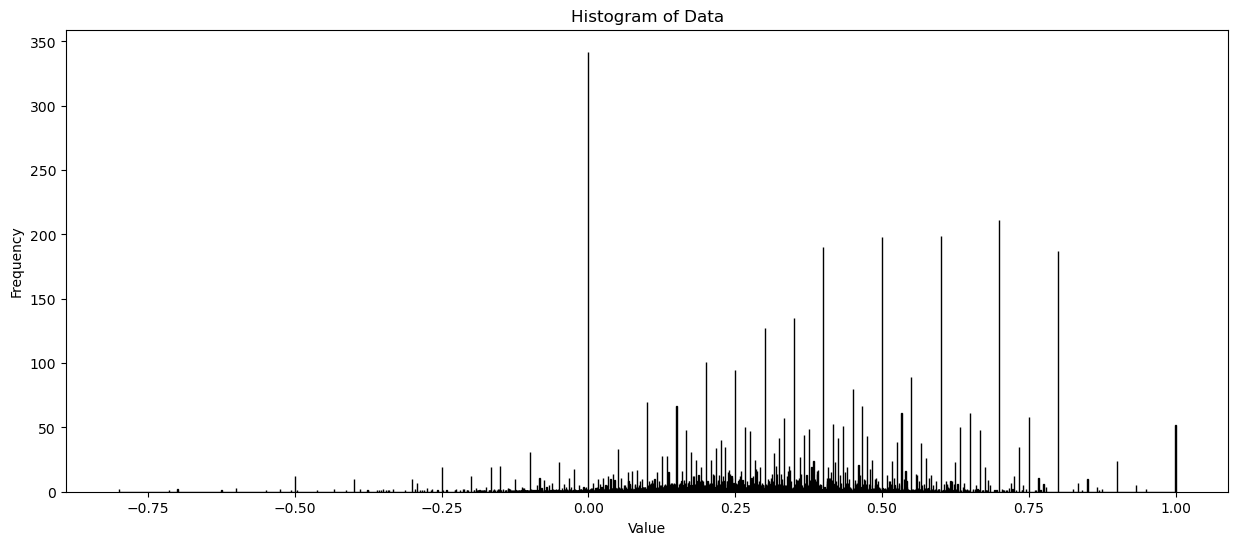

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.hist(df['polarity'], bins=len(df['polarity']), color='green', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

plt.show()

## Encoding target variable-sentiment

In [27]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['sentiment']= label_encoder.fit_transform(df['sentiment'])
print(df['sentiment'].unique())
print()
print(df['sentiment'].value_counts())
print(df.head())

[2 1 0]

sentiment
2    9022
1     772
0     467
Name: count, dtype: int64
       reviewerID        asin  overall   reviewTime  \
0  A2IBPI20UZIR0U  1384719342      5.0  02 28, 2014   
1  A14VAT5EAX3D9S  1384719342      5.0  03 16, 2013   
2  A195EZSQDW3E21  1384719342      5.0  08 28, 2013   
3  A2C00NNG1ZQQG2  1384719342      5.0  02 14, 2014   
4   A94QU4C90B1AX  1384719342      5.0  02 21, 2014   

                                             reviews  sentiment  year  month  \
0  much write exactli suppos filter pop sound rec...          2  2014      2   
1  product exactli quit affordablei realiz doubl ...          2  2013      3   
2  primari job devic block breath would otherwis ...          2  2013      8   
3  nice windscreen protect mxl mic prevent pop th...          2  2014      2   
4  pop filter great look perform like studio filt...          2  2014      2   

   day  helpful_rate  polarity  review_len  word_count  
0   28          0.00  0.387500         142          24  

## TFIDF(Term Frequency — Inverse Document Frequency)

**The TfidfVectorizer class in scikit-learn allows for several parameters to be adjusted for customizing the vectorization process**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=10000,ngram_range=(2,2))

X= tfidf_vectorizer.fit_transform(df['reviews'])
y=df['sentiment']

print(X.shape)
print(y.shape)

(10261, 10000)
(10261,)


## Handling Imbalance target feature-SMOTE

SMOTE stands for Synthetic Minority Over-sampling Technique. It is a technique used in imbalanced classification problems to address the issue of class imbalance. In imbalanced datasets, one class (the minority class) is significantly underrepresented compared to the other class(es) (the majority class or classes). This class imbalance can lead to poor performance of machine learning models, particularly those trained using traditional techniques that assume balanced classes.

SMOTE works by generating synthetic examples of the minority class, effectively oversampling it to balance the class distribution

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(X_res.shape)
print(y_res.shape)

(27066, 10000)
(27066,)


# spliteing dATA

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20299, 10000) (6767, 10000) (20299,) (6767,)


# Model selection
**First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process**

In [31]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8801287270974146
Decision Tree Test Accuracy: 0.8015771062406639
KNN Test Accuracy: 0.8795439317757772
SVC Test Accuracy: 0.879836329436596
Naive Bayes Test Accuracy: 0.8085940806793571


**Logistic Regression with Hyperparameter tuning**

We use regularization parameter and penality for parameter tuning

Lasso regression (L1)
Ridge Regression (L2)

In [32]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings

warnings.filterwarnings("ignore")

param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression(C=10000.0, random_state=0)
The mean accuracy of the model is: 0.9590660558593173


In [33]:
logreg = LogisticRegression(C=0.91, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


# Classification metrics¶

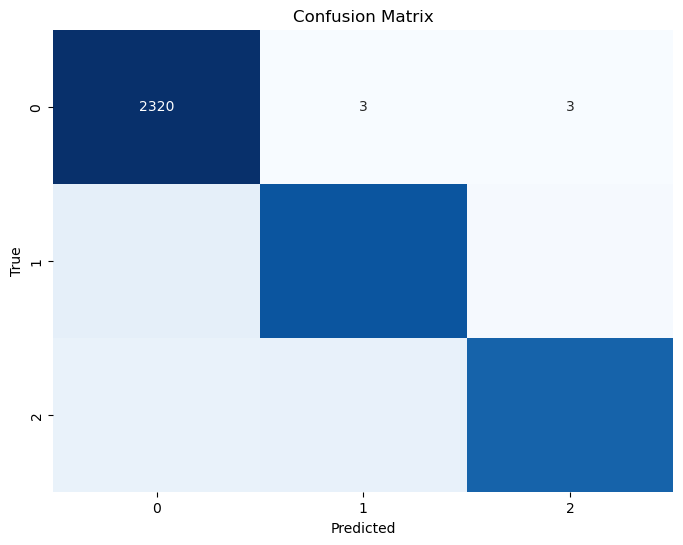

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm,annot=True, cmap='Blues', fmt='d', cbar=False)
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.metrics import classification_report,f1_score

print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      2326
           1       0.92      0.89      0.90      2232
           2       0.98      0.84      0.91      2209

    accuracy                           0.91      6767
   macro avg       0.92      0.91      0.91      6767
weighted avg       0.92      0.91      0.91      6767

